In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.random_projection import johnson_lindenstrauss_min_dim, SparseRandomProjection
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [2]:
# Reading the credit card Dataset of 17 Dimensions
cc = pd.read_csv('./Data/CC GENERAL.csv')
cc = cc.drop(['CUST_ID'], axis=1)
cc.dropna(inplace=True)
print("Credit Card Dataset: ", cc.shape[1])

# Load the Digits Dataset of 64+ Dimensions
digits = load_digits()
digits = pd.DataFrame(digits.data)
print("Digits Dataset: ", digits.shape[1])

# Reading the House Prices Dataset of 9000+ Dimensions
house_prices = pd.read_csv("./Data/HousePrices.csv")
# Encoding text data
ohe = OneHotEncoder(handle_unknown='ignore', sparse=True)
house_prices = ohe.fit_transform(house_prices).toarray()
print("House Prices Dataset: ", house_prices.shape[1])

Credit Card Dataset:  17
Digits Dataset:  64
House Prices Dataset:  9771


## KMeans

In [3]:
def kmeans_implementation(X, X_reduced):
    wcss_X_values = []
    wcss_truncated_X_values = []

    for k in range(1, 21):
        # Perform k-means clustering on original df
        kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
        kmeans.fit(X)
        wcss_X = kmeans.inertia_
        wcss_X_values.append(wcss_X)
        
        # Perform k-means clustering on truncated df
        kmeans_truncated = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
        kmeans_truncated.fit(X_reduced)
        wcss_truncated_X = kmeans_truncated.inertia_
        wcss_truncated_X_values.append(wcss_truncated_X)

    plt.plot(range(1, 21), wcss_X_values, label='X')
    plt.plot(range(1, 21), wcss_truncated_X_values, label='Reduced X')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.title('Comparison of WCSS values for X and Reduced X')
    plt.legend()
    plt.show()

## Factor Analysis

### Results for Credit Card Dataset

In [5]:
kmo_all,kmo_model=calculate_kmo(cc)
kmo_model

0.6408932395421388

In [6]:
fa = FactorAnalyzer()
fa.fit(cc)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([4.62930009e+00, 3.46363229e+00, 1.51611673e+00, 1.28751346e+00,
       1.06702509e+00, 9.71173642e-01, 8.35751939e-01, 7.15824825e-01,
       6.25888438e-01, 5.23856343e-01, 4.01846616e-01, 3.01671735e-01,
       2.42540745e-01, 2.00372153e-01, 1.71376520e-01, 4.60976542e-02,
       1.17307815e-05])

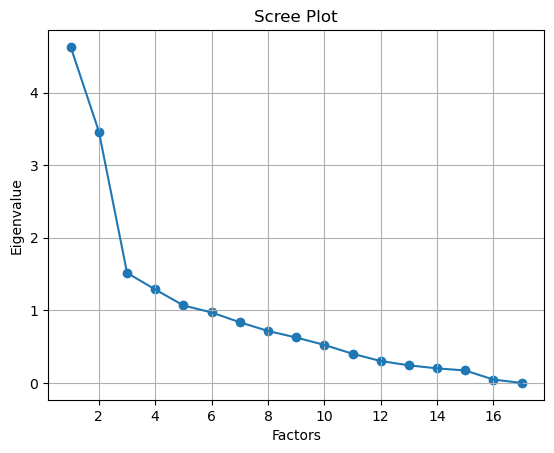

In [7]:
# Create scree plot using matplotlib
plt.scatter(range(1,cc.shape[1]+1),eigen_values)
plt.plot(range(1,cc.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [8]:
fa = FactorAnalyzer()
fa.set_params(n_factors = 8, rotation = "varimax")
fa.fit(cc)
loadings = fa.loadings_
df_fa_cc = pd.DataFrame({'Column1': fa.loadings_[:, 0], 'Column2': fa.loadings_[:, 1], 'Column3': fa.loadings_[:, 2], 'Column4': fa.loadings_[:, 3], 'Column5': fa.loadings_[:, 4], 'Column6': fa.loadings_[:, 5]})

In [9]:
df_fa_cc.head()

,Column1,Column2,Column3,Column4,Column5,Column6
0,0.100259,0.307874,-0.049528,-0.018417,0.671457,0.668024
1,0.044944,0.116019,0.217280,0.169214,0.433166,-0.012080
2,0.876549,-0.063767,0.189453,0.153719,0.028192,0.138182
3,0.970126,-0.052446,0.066519,0.192769,0.017886,0.112147
4,0.298459,-0.054899,0.333487,0.007065,0.034743,0.121893


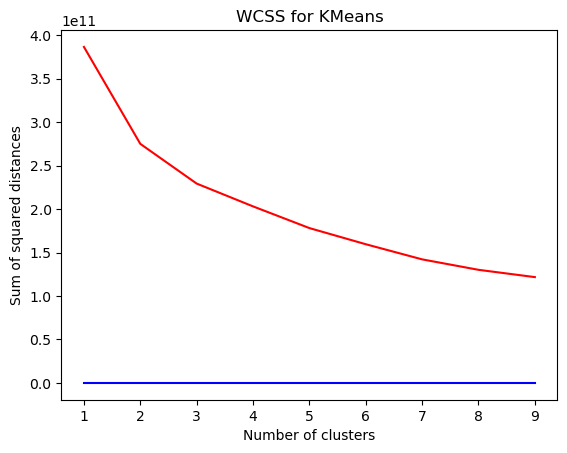

In [12]:
fa_list = []
cc_list = []


K = range(1, 10)

for k in range(1, 10):
    
    
    kmeans = KMeans(n_clusters=k,  init = 'k-means++', random_state = 48)
    kmeans.fit(cc)
    cc_list.append(kmeans.inertia_)
    
for k in range(1, 10):
    
    
    kmeans_fa = KMeans(n_clusters=k,  init = 'k-means++', random_state = 48)
    kmeans_fa.fit(df_fa_cc)
    fa_list.append(kmeans_fa.inertia_)



plt.plot(K,cc_list, c='red') 
plt.plot(K,fa_list, c='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('WCSS for KMeans')
plt.show()

### Results for Digits Dataset

In [14]:
kmo_all,kmo_model=calculate_kmo(digits)
kmo_model

nan

### Results for House Dataset

In [13]:
kmo_all,kmo_model=calculate_kmo(house_prices)
kmo_model

nan

## Principal Component Analysis

In [22]:
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

### Results for Credit Card Dataset

<AxesSubplot: >

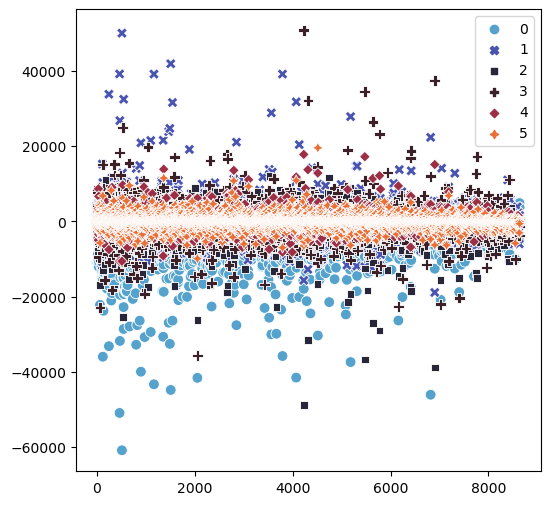

In [24]:
mat_reduced = PCA(cc , 6)
principal_df = pd.DataFrame(mat_reduced)
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df, s = 60 , palette= 'icefire')

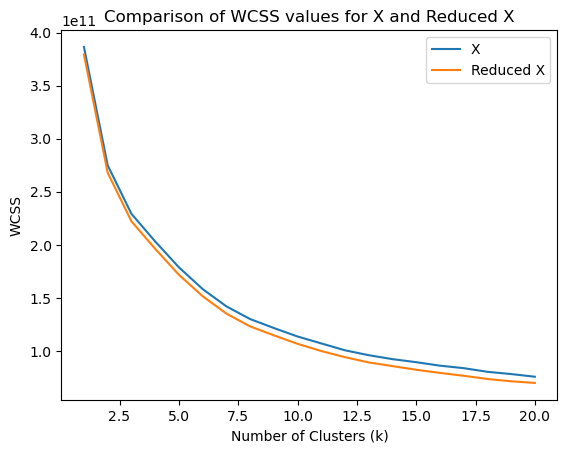

In [25]:
kmeans_implementation(cc, principal_df)

### Results for Digits Dataset

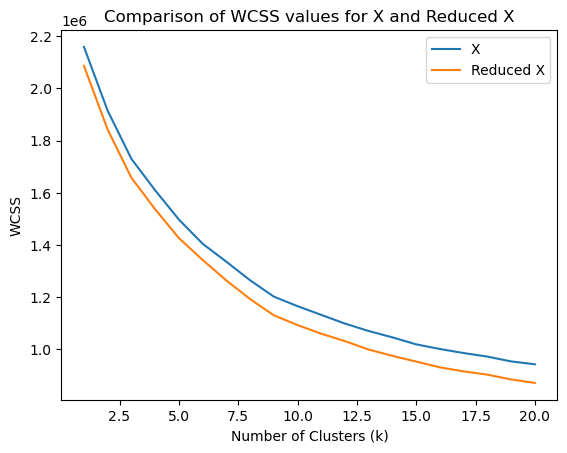

In [27]:
dig_reduced = PCA(digits, 32)
dig_df = pd.DataFrame(dig_reduced)
kmeans_implementation(digits, dig_df)

### Results for House Prices Dataset

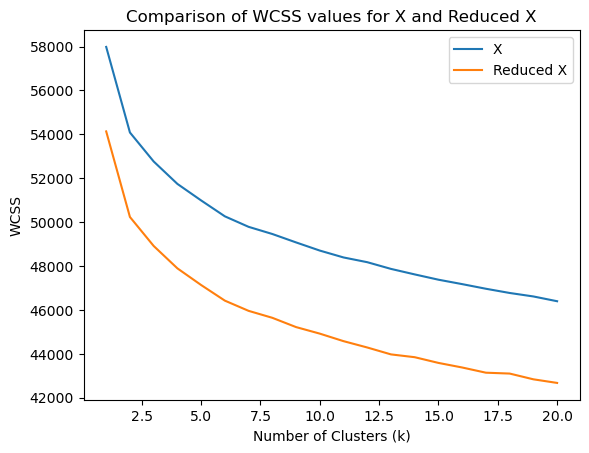

In [28]:
house_reduced = PCA(house_prices, 900)
house_df = pd.DataFrame(house_reduced)
kmeans_implementation(house_prices, house_df)

## Truncated SVD

In [29]:
def truncated_svd(X, k):
    # Calculate X^T X and X X^T
    XtX = np.dot(X.T, X)
    XXt = np.dot(X, X.T)
    
    # Calculate eigendecomposition of X^T X
    eigenvalues, eigenvectors = np.linalg.eig(XtX)
    indices = eigenvalues.argsort()[::-1] # Sort eigenvalues in decreasing order
    eigenvalues = eigenvalues[indices]
    eigenvectors = eigenvectors[:,indices]
    
    # Calculate square root of eigenvalues
    sqrt_eigenvalues = np.sqrt(eigenvalues)
    
    # Calculate V matrix
    V = eigenvectors
    
    # Calculate U matrix
    U = np.dot(X, V) / sqrt_eigenvalues
    
    # Truncate U, S, and V matrices
    Uk = U[:, :k]
    Sk = np.diag(sqrt_eigenvalues[:k])
    Vk = V[:, :k]
    
    X_k = np.real(np.dot(Uk, Sk))
    
    return X_k

In [30]:
def truncated_svd_cev(X):
    singular_values = np.linalg.svd(X, compute_uv=False)

    cev = np.cumsum(singular_values**2) / np.sum(singular_values**2)

    plt.plot(cev)
    plt.xlabel('Number of singular values (k)')
    plt.ylabel('Cumulative explained variance (CEV)')
    plt.title('Elbow method for truncated SVD')
    plt.show()

### Results for Credit Card Dataset

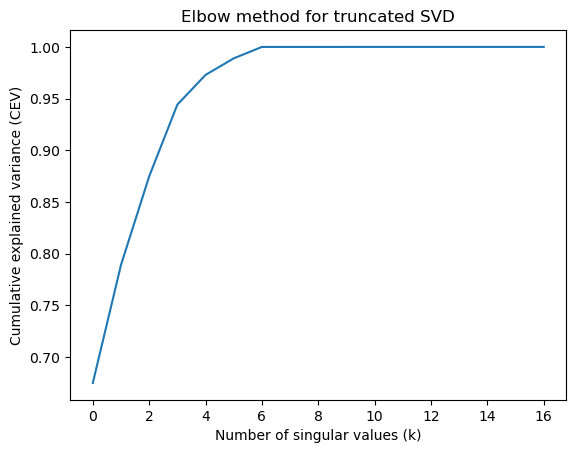

In [31]:
truncated_svd_cev(cc)

Optimal Number of Components for this dataset is 6

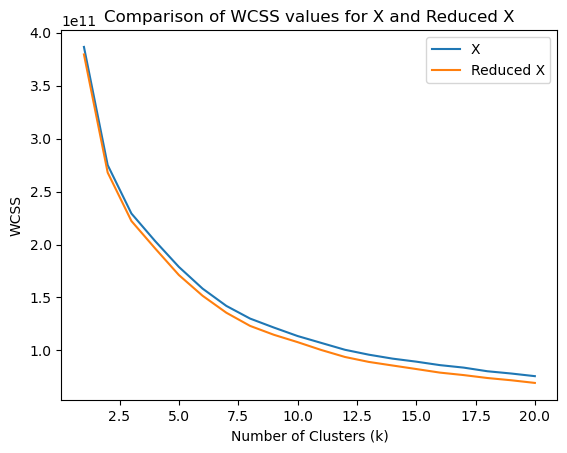

In [32]:
cc_reduced = truncated_svd(cc, 6)
kmeans_implementation(cc, cc_reduced)

### Results for Digits Dataset

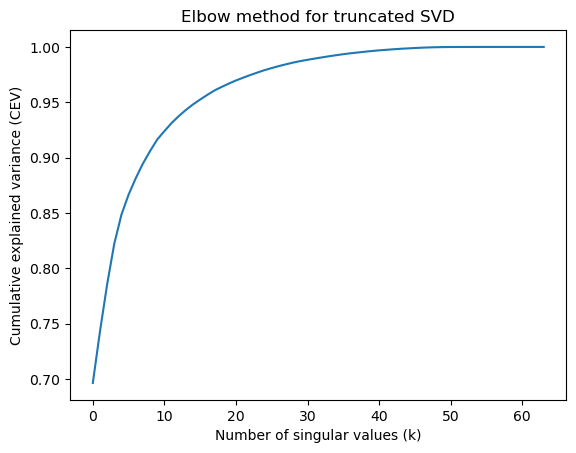

In [33]:
truncated_svd_cev(digits)

Optimal Number of components is around 30 to 40

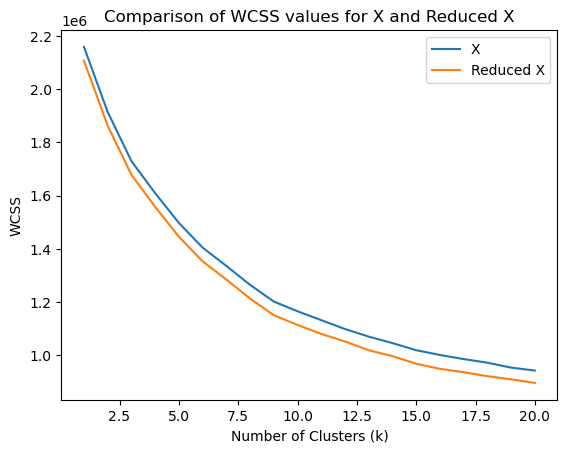

In [34]:
digits_reduced = truncated_svd(digits, 35)
kmeans_implementation(digits, digits_reduced)

### Results on the House Prices Dataset

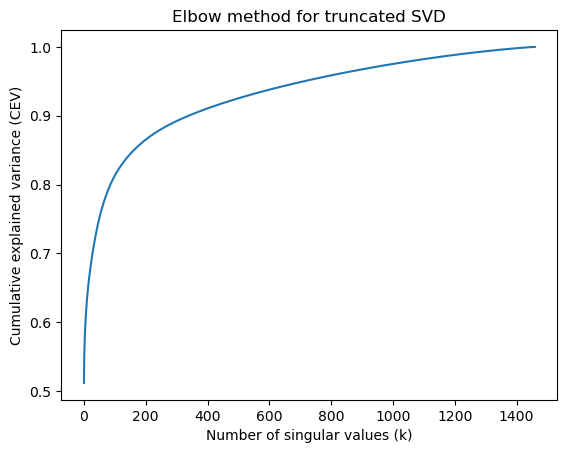

In [35]:
truncated_svd_cev(house_prices)

Optimal Number of components for this dataset is between 300 and 400

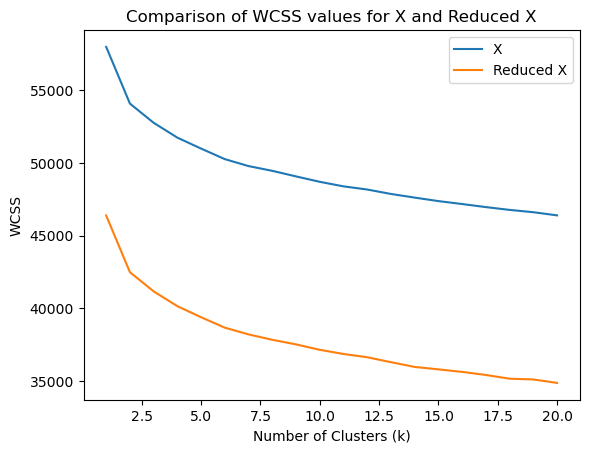

In [36]:
house_prices_reduced = truncated_svd(house_prices, 350)
kmeans_implementation(house_prices, house_prices_reduced)

## Johnson Lindenstrauss Lemma

In [40]:
def js_lemma(X):
    # Calculate the minimum number of dimensions required for Johnson-Lindenstrauss
    n_components = johnson_lindenstrauss_min_dim(X.shape[0], eps=0.5)

    # Perform sparse random projection
    srp = SparseRandomProjection(n_components=n_components)
    X_srp = srp.fit_transform(X)

    # print(n_components)

    return X_srp

### Results for Credit Card Dataset

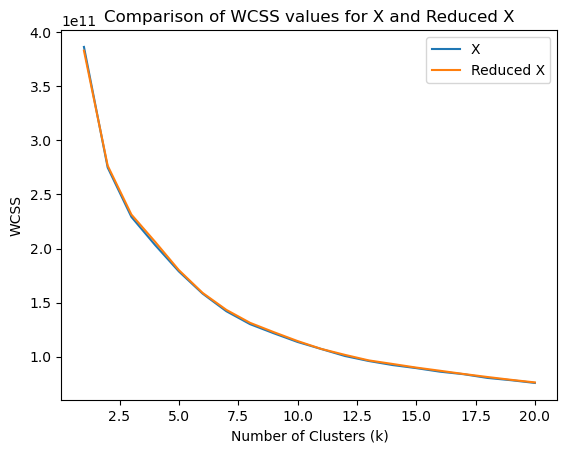

In [41]:
cc_reduced = js_lemma(cc)
kmeans_implementation(cc, cc_reduced)

### Results for Digits Dataset

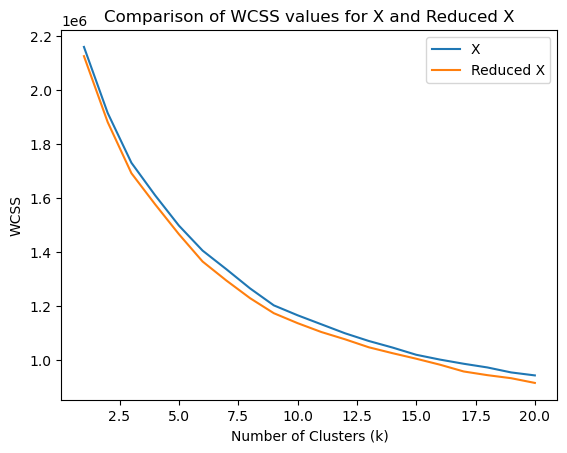

In [42]:
digits_reduced = js_lemma(digits)
kmeans_implementation(digits, digits_reduced)

### Results for House Prices Dataset

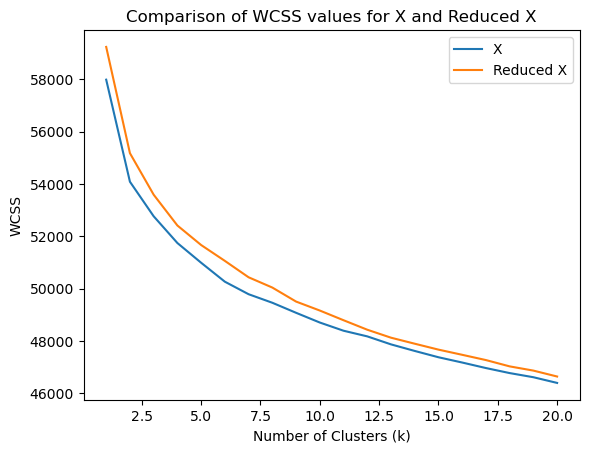

In [43]:
house_prices_reduced = js_lemma(house_prices)
kmeans_implementation(house_prices, house_prices_reduced)